<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas/HeartFailure2.csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,NaN,1.0,160.0,1,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
295,55.0,0.0,1820.0,0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0.0
296,45.0,0.0,2060.0,1,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,45.0,0.0,2413.0,0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


In [ ]:
df.isnull().sum()

age                         14
anaemia                      6
creatinine_phosphokinase     5
diabetes                     0
ejection_fraction            4
high_blood_pressure          3
platelets                    5
serum_creatinine             5
serum_sodium                 2
sex                          4
smoking                      3
time                         2
DEATH_EVENT                  2
dtype: int64

In [ ]:
df.dtypes

age                         float64
anaemia                     float64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                         float64
smoking                     float64
time                        float64
DEATH_EVENT                 float64
dtype: object

In [ ]:
#Unique value count
df['smoking'].value_counts()

0.0    201
1.0     95
Name: smoking, dtype: int64

In [ ]:
def valuesbycolumn(col):
  return col.nunique(axis=0)
  
valuesbycolumn(df)

age                          46
anaemia                       2
creatinine_phosphokinase    206
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   173
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        146
DEATH_EVENT                   2
dtype: int64

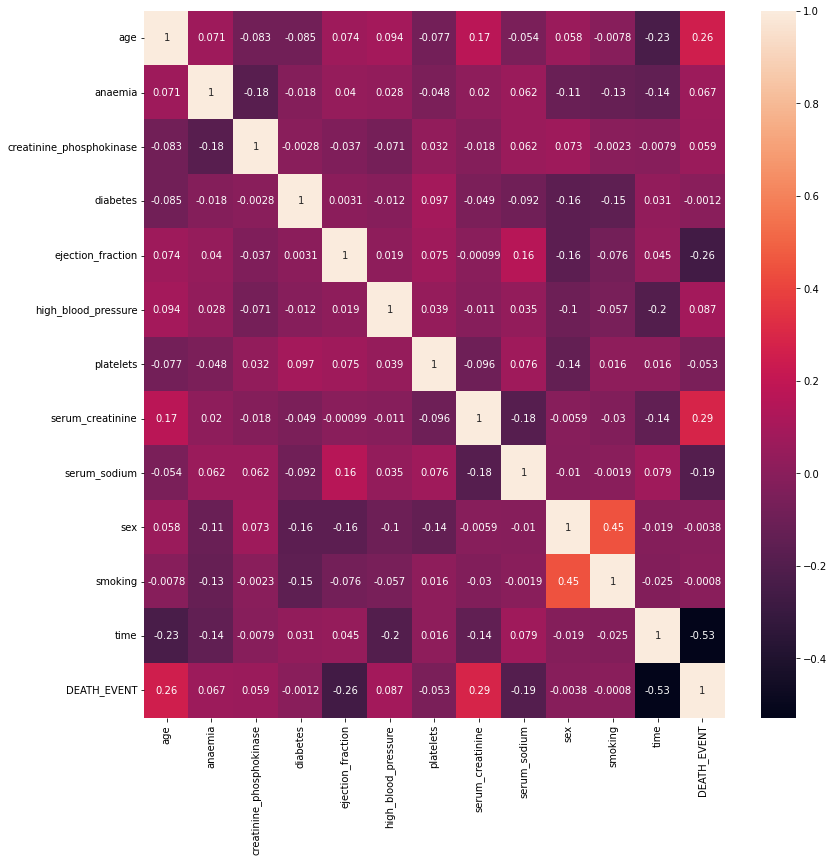

In [ ]:
#Correlation Table
corrmat =df.corr()
corr_features =corrmat.index
plt.figure(figsize=(13,13))
g= sns.heatmap(df[corr_features].corr(), annot=True)
#No correlation among varibales so I will check box plot



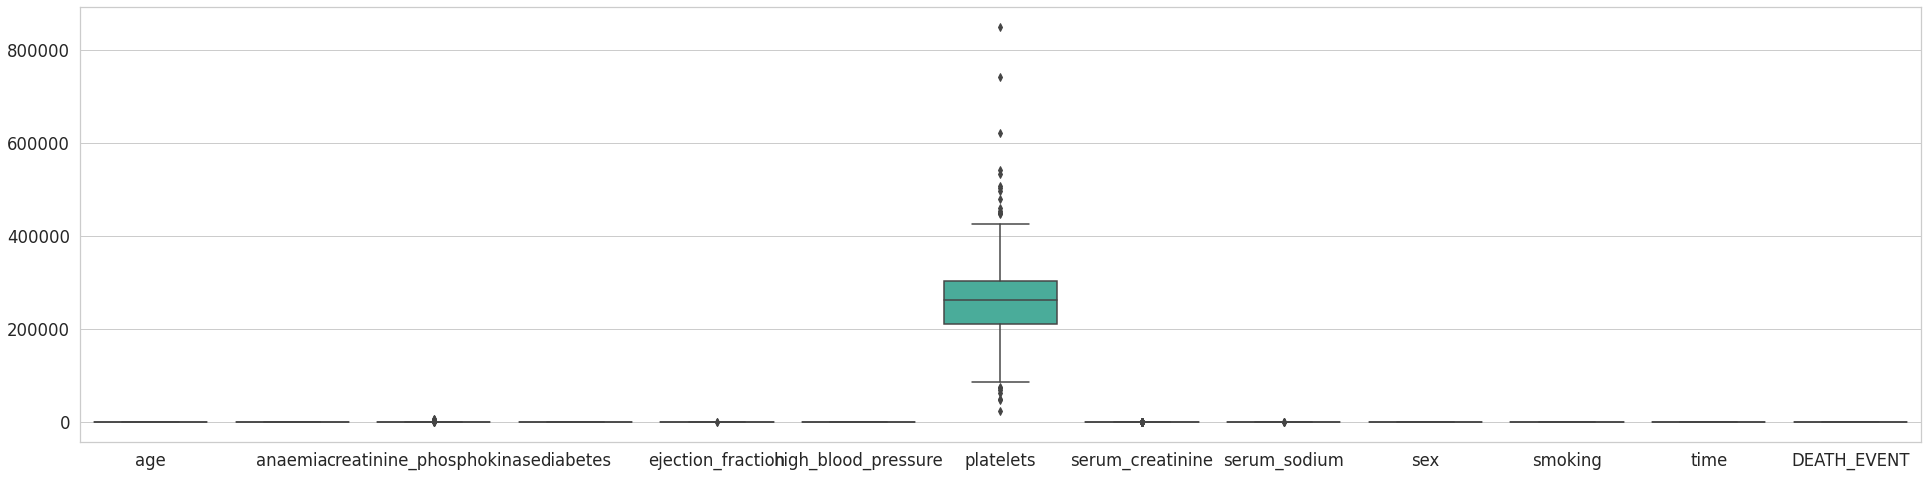

In [ ]:
# Creating box-plot

sns.set(rc={'figure.figsize':(33,8)}, font_scale=1.5, style='whitegrid')
#boxplot = df.boxplot()
sns.boxplot(data=df)
plt.show()
#Boxplot shows if there is outliers and variance of each variables

In [ ]:
#Filling Nas with median
def fillnas(file):
  for col in file.columns:
    #print(df.age.isnull().sum())
    med=df.loc[df[col].notnull(),col].median()
    #print(med)
    df.loc[df[col].isnull(), col]=med
    print(df.age.isnull().sum())
  return file

In [ ]:
fillnas(df)
df.isnull().sum()

0
0
0
0
0
0
0
0
0
0
0
0
0


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#We need to remove the outliers and scale them
from scipy import stats
z_scores= stats.zscore(df)
abs_z_scores= np.abs(z_scores)
filtered= (abs_z_scores<3). all(axis=1)
newdf = df[filtered]
newdf


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0,20.0,1.0,265000.0,1.9,130.0,1.0,0.0,4.0,1.0
2,65.0,0.0,146.0,0,20.0,0.0,162000.0,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0,20.0,0.0,210000.0,1.9,137.0,1.0,0.0,7.0,1.0
5,60.0,1.0,47.0,0,40.0,1.0,204000.0,2.1,132.0,1.0,1.0,8.0,1.0
6,60.0,1.0,246.0,0,15.0,0.0,127000.0,1.2,137.0,1.0,0.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1.0,103.0,1,35.0,0.0,179000.0,0.9,136.0,1.0,1.0,270.0,0.0
294,62.0,0.0,61.0,1,38.0,1.0,155000.0,1.1,143.0,1.0,1.0,270.0,0.0
295,55.0,0.0,1820.0,0,38.0,0.0,270000.0,1.2,139.0,0.0,0.0,271.0,0.0
297,45.0,0.0,2413.0,0,38.0,0.0,140000.0,1.4,140.0,1.0,1.0,280.0,0.0


In [ ]:
#Scaling the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
newdf.iloc[:,1:13] = scaler.fit_transform(newdf.iloc[:,1:13])
newdf.iloc[:,1:13]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.0,0.201732,0.0,0.117647,1.0,0.463217,0.358974,0.250000,1.0,0.0,0.000000,1.0
2,0.0,0.044388,0.0,0.117647,0.0,0.264337,0.205128,0.208333,1.0,1.0,0.010676,1.0
3,1.0,0.031757,0.0,0.117647,0.0,0.357019,0.358974,0.541667,1.0,0.0,0.010676,1.0
5,1.0,0.008661,0.0,0.509804,1.0,0.345433,0.410256,0.333333,1.0,1.0,0.014235,1.0
6,1.0,0.080476,0.0,0.019608,0.0,0.196756,0.179487,0.541667,1.0,0.0,0.021352,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293,1.0,0.028870,1.0,0.411765,0.0,0.297162,0.102564,0.500000,1.0,1.0,0.946619,0.0
294,0.0,0.013713,1.0,0.470588,1.0,0.250821,0.153846,0.791667,1.0,1.0,0.946619,0.0
295,0.0,0.648502,0.0,0.470588,0.0,0.472871,0.179487,0.625000,0.0,0.0,0.950178,0.0
297,0.0,0.862505,0.0,0.470588,0.0,0.221858,0.230769,0.666667,1.0,1.0,0.982206,0.0


In [ ]:
valuesbycolumn(df)

age                          46
anaemia                       2
creatinine_phosphokinase    206
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   174
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        146
DEATH_EVENT                   2
dtype: int64

In [ ]:
#Now convert to Categorical Variable
for col in newdf.loc[:,('anaemia','diabetes','high_blood_pressure', 'sex','smoking','DEATH_EVENT') ]:
    newdf[col] = newdf[col].astype('category')

    #dfmi.loc[:, ('one', 'second')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
newdf.dtypes

age                          float64
anaemia                     category
creatinine_phosphokinase     float64
diabetes                    category
ejection_fraction            float64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                 float64
sex                         category
smoking                     category
time                         float64
DEATH_EVENT                 category
dtype: object

In [ ]:
col_count= len(newdf.columns)
X, y = newdf.drop(newdf.columns[col_count-1], axis=1), newdf[newdf.columns[col_count-1]]

In [ ]:
X.iloc[:,1:12].head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.0,0.201732,0.0,0.117647,1.0,0.463217,0.358974,0.250000,1.0,0.0,0.000000
2,0.0,0.044388,0.0,0.117647,0.0,0.264337,0.205128,0.208333,1.0,1.0,0.010676
3,1.0,0.031757,0.0,0.117647,0.0,0.357019,0.358974,0.541667,1.0,0.0,0.010676
5,1.0,0.008661,0.0,0.509804,1.0,0.345433,0.410256,0.333333,1.0,1.0,0.014235
6,1.0,0.080476,0.0,0.019608,0.0,0.196756,0.179487,0.541667,1.0,0.0,0.021352


In [ ]:
## 1. Univariate Selection
# The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
# The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the data.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top k=12 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
#Note that we cant include categorical variables
fit = bestfeatures.fit(X.iloc[:,1:12],y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                       Specs      Score
10                   smoking  12.168349
6                  platelets   3.583905
3                   diabetes   2.660653
4          ejection_fraction   1.001259
7           serum_creatinine   0.558315
0                        age   0.179813
1                    anaemia   0.046458
5        high_blood_pressure   0.037192
9                        sex   0.004192
8               serum_sodium   0.000810
2   creatinine_phosphokinase   0.000166


[0.02822751 0.07530525 0.03349015 0.14950117 0.02679246 0.07711026
 0.13604088 0.10132002 0.02717274 0.02739667 0.3176429 ]


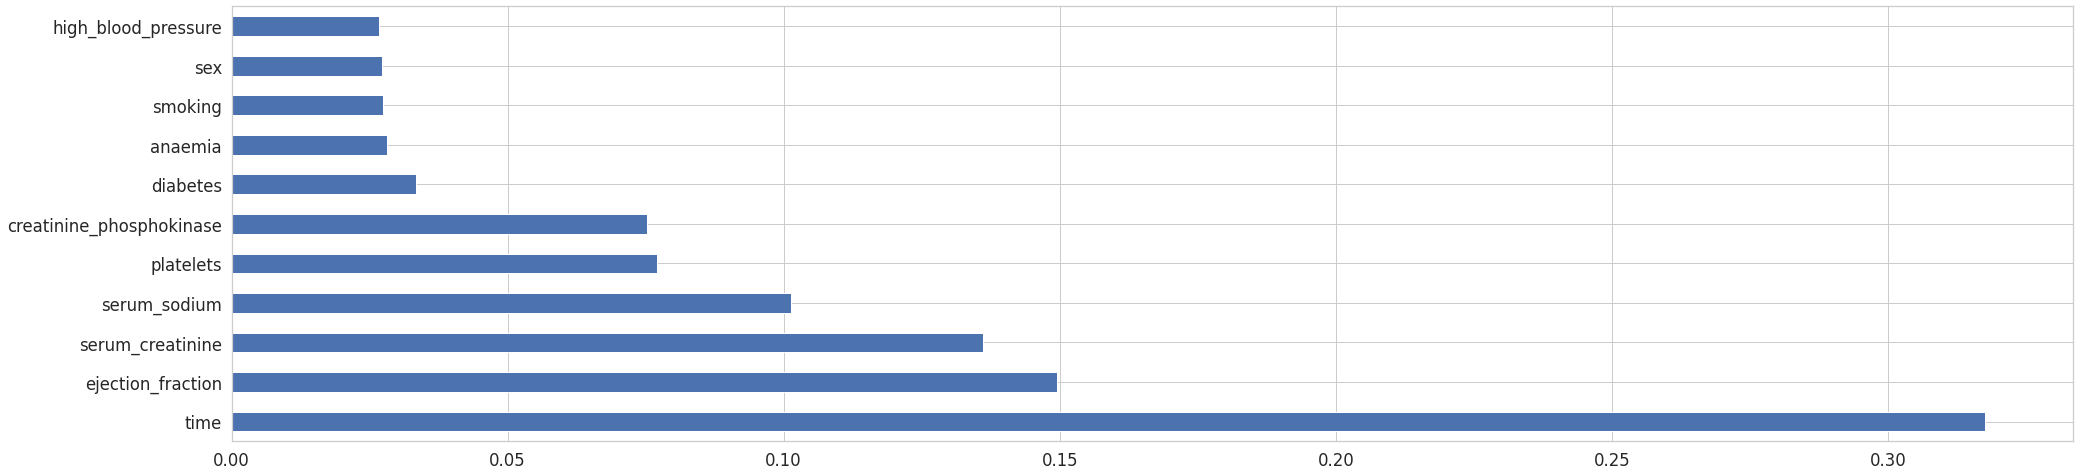

In [ ]:
#Feature Importance
#You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
#Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
#Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
XX=X.iloc[:,1:12]
model = ExtraTreesClassifier()
model.fit(XX,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XX.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()


In [ ]:
#Dropping less important columns
newdf.drop(["anaemia","serum_sodium","high_blood_pressure", "sex"], axis=1, inplace=True)
X= newdf.copy()
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,smoking,time,DEATH_EVENT
0,75.0,0.201732,0.0,0.117647,0.463217,0.358974,0.0,0.000000,1.0
2,65.0,0.044388,0.0,0.117647,0.264337,0.205128,1.0,0.010676,1.0
3,50.0,0.031757,0.0,0.117647,0.357019,0.358974,0.0,0.010676,1.0
5,60.0,0.008661,0.0,0.509804,0.345433,0.410256,1.0,0.014235,1.0
6,60.0,0.080476,0.0,0.019608,0.196756,0.179487,0.0,0.021352,1.0


In [ ]:
#One hot encoding for categorical variables
X = pd.get_dummies(X, columns = ['smoking','diabetes'], drop_first = False)
#X = X.join(df)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time,DEATH_EVENT,smoking_0.0,smoking_1.0,diabetes_0.0,diabetes_1.0
0,75.0,0.201732,0.117647,0.463217,0.358974,0.000000,1.0,1,0,1,0
2,65.0,0.044388,0.117647,0.264337,0.205128,0.010676,1.0,0,1,1,0
3,50.0,0.031757,0.117647,0.357019,0.358974,0.010676,1.0,1,0,1,0
5,60.0,0.008661,0.509804,0.345433,0.410256,0.014235,1.0,0,1,1,0
6,60.0,0.080476,0.019608,0.196756,0.179487,0.021352,1.0,1,0,1,0


In [ ]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

In [ ]:
#Encodeing for Y
y = LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
#Dummy Classifieer
from sklearn.dummy import DummyClassifier
# define the reference model
model = DummyClassifier(strategy='most_frequent')

In [ ]:
from numpy import mean
# Evaluate the model
scores_dummy = evaluate_model(X, y, model)
# summarize performance
print(scores_dummy)
print('Mean Accuracy: %.3f'  % (mean(scores_dummy)))

[0.67857143 0.67857143 0.67857143 0.67857143 0.67857143 0.67857143
 0.71428571 0.71428571 0.71428571 0.71428571 0.67857143 0.67857143
 0.67857143 0.67857143 0.67857143 0.67857143 0.71428571 0.71428571
 0.71428571 0.71428571 0.67857143 0.67857143 0.67857143 0.67857143
 0.67857143 0.67857143 0.71428571 0.71428571 0.71428571 0.71428571]
Mean Accuracy: 0.693


In [ ]:
#Decision Tree(DTree) 
from sklearn import tree
model_DTree= tree.DecisionTreeClassifier()

In [ ]:
# Evaluate the model
scores_Dtree = evaluate_model(X, y, model_DTree)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_Dtree)))
print(scores_Dtree)

Mean Accuracy: 1.000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import SVC
model_SVM= SVC(gamma='scale')

In [ ]:
# Evaluate the model
scores_SVM = evaluate_model(X, y, model_SVM)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_SVM)))
print(scores_SVM)

Mean Accuracy: 0.693
[0.67857143 0.67857143 0.67857143 0.67857143 0.67857143 0.67857143
 0.71428571 0.71428571 0.71428571 0.71428571 0.67857143 0.67857143
 0.67857143 0.67857143 0.67857143 0.67857143 0.71428571 0.71428571
 0.71428571 0.71428571 0.67857143 0.67857143 0.67857143 0.67857143
 0.67857143 0.67857143 0.71428571 0.71428571 0.71428571 0.71428571]


In [ ]:
#Bagged Decision Trees (BAG)
from sklearn.ensemble import BaggingClassifier
model_BAG =BaggingClassifier(n_estimators=100)

In [ ]:
# Evaluate the model
scores_BAG = evaluate_model(X, y, model_BAG)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_BAG)))
print(scores_BAG)

Mean Accuracy: 1.000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
#Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

In [ ]:
# Evaluate the model
scores_RF = evaluate_model(X, y, model_RF)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_RF)))
print(scores_RF)

Mean Accuracy: 1.000
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
#Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier
model_GBM =GradientBoostingClassifier(n_estimators=100)

In [ ]:
# Evaluate the model
scores_GBM = evaluate_model(X, y, model_GBM)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_GBM)))

Mean Accuracy: 1.000


In [ ]:
#Crete a data frame
df_scores = pd.DataFrame({'Model'   : ["Dummy", "DecisonTree",  "SVM",  'Bagged DecisionTree', 'Random Forest','Gradient Boosting'],
                          'Accuracy': [mean(scores_dummy),mean(scores_Dtree),mean(scores_SVM),mean(scores_BAG),mean(scores_RF),mean(scores_GBM)]
                   })
print(df_scores)

                 Model  Accuracy
0                Dummy  0.692857
1          DecisonTree  1.000000
2                  SVM  0.692857
3  Bagged DecisionTree  1.000000
4        Random Forest  1.000000
5    Gradient Boosting  1.000000


In [ ]:
sorted_df = df_scores.sort_values(["Accuracy"], ascending=True)
sorted_df

,Model,Accuracy
0,Dummy,0.692857
2,SVM,0.692857
1,DecisonTree,1.000000
3,Bagged DecisionTree,1.000000
4,Random Forest,1.000000
5,Gradient Boosting,1.000000
